## 0. 호출

In [1]:
from matplotlib import pyplot as plt
from tqdm import tqdm
import pandas as pd

## 1. 비교 대상

In [2]:
aug_data = pd.read_csv ("/opt/new/level2_klue-nlp-03/augmentation/sym_augmented_data.csv") # aumentation 적용 DT
raw_data = pd.read_csv ("/opt/new/level2_klue-nlp-03/data/train_data.csv") # 원본 DT

## 2. 증강정도 확인

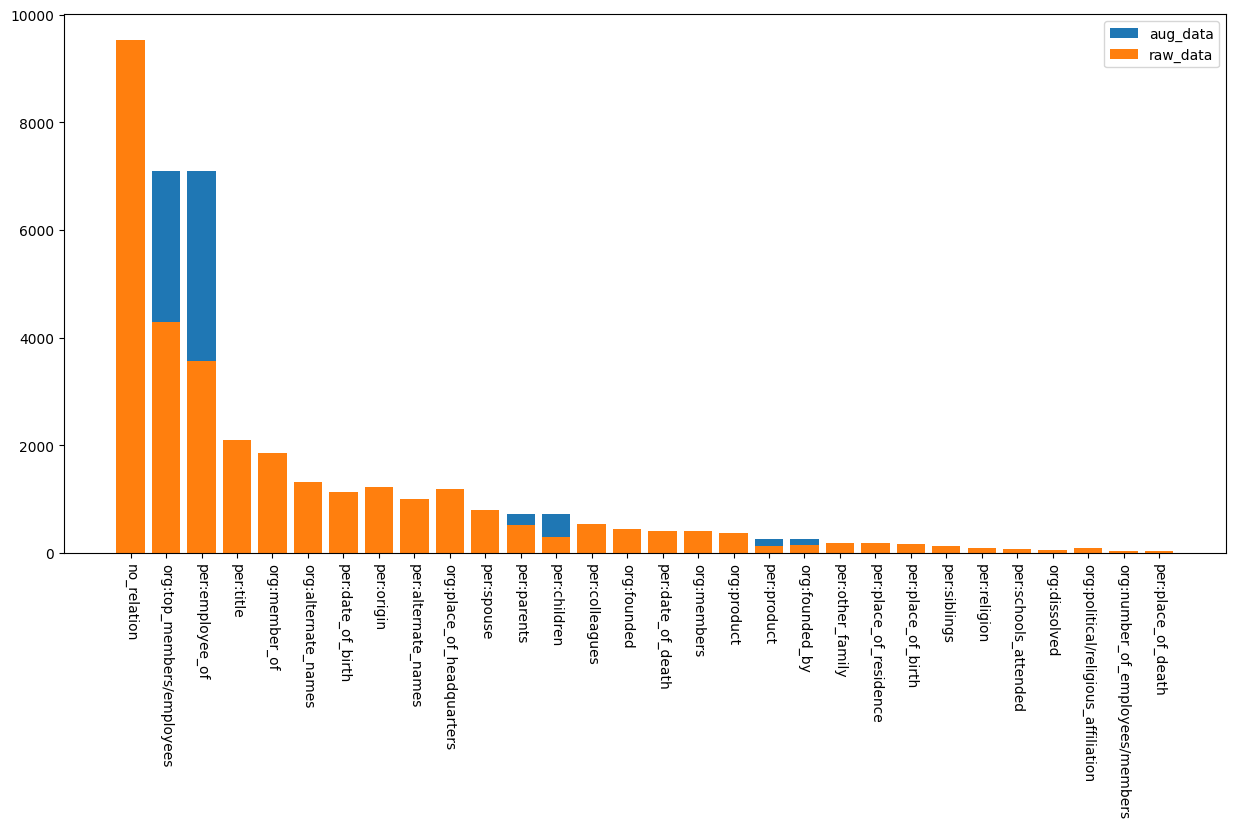

In [3]:
aug_counts = aug_data['label'].value_counts()
aug_counts_df = pd.DataFrame({'label': aug_counts.index, 'values': aug_counts.values})

raw_counts = raw_data['label'].value_counts()
raw_counts_df = pd.DataFrame({'label': raw_counts.index, 'values': raw_counts.values})

plt.figure(figsize = (15, 7))
plt.bar(aug_counts_df['label'], aug_counts_df['values'], label="aug_data")
plt.bar(raw_counts_df['label'], raw_counts_df['values'], label="raw_data")
plt.legend()
plt.xticks(rotation=-90)
plt.show()


In [4]:
aug_result=pd.DataFrame(aug_counts_df['values'])
aug_result

,values
0,9534
1,7104
2,7104
3,1845
4,1493
5,1260
6,1128
7,1088
8,951
9,894


## 3. 정답율 확인

In [5]:
#모델 정답율
#정답율 증가 정도
aug_csv_path = "/opt/new/level2_klue-nlp-03/results/05-12-20:12:24/test_result.csv"
og_csv_path = "/opt/new/level2_klue-nlp-03/results/05-12-20:56:53/test_result.csv"

aug_val_result = pd.read_csv(aug_csv_path)
aug_val_result['correct'] = aug_val_result['target'] == aug_val_result['predict']

og_val_result = pd.read_csv(og_csv_path)
og_val_result['correct'] = og_val_result['target'] == og_val_result['predict']

In [6]:
aug_label_stats = pd.DataFrame()
label_counts = aug_val_result.groupby('target')['predict'].count()
aug_correct_counts = aug_val_result.groupby('target')['predict'].apply(lambda x: (x == x.name).sum())
aug_label_stats['total'] = label_counts
aug_label_stats['correct'] = aug_correct_counts
aug_label_stats['correct_ratio'] = aug_label_stats['correct'] / aug_label_stats['total']
aug_label_stats

,total,correct,correct_ratio
target,,,
no_relation,1907,1378,0.722601
org:alternate_names,252,223,0.884921
org:dissolved,13,8,0.615385
org:founded,90,86,0.955556
org:founded_by,54,49,0.907407
org:member_of,299,231,0.772575
org:members,76,40,0.526316
org:number_of_employees/members,9,8,0.888889
org:place_of_headquarters,179,127,0.709497


In [7]:
og_label_stats = pd.DataFrame()
label_counts = og_val_result.groupby('target')['predict'].count()
og_correct_counts = og_val_result.groupby('target')['predict'].apply(lambda x: (x == x.name).sum())
og_label_stats['total'] = label_counts
og_label_stats['correct'] = og_correct_counts
og_label_stats['correct_ratio'] = og_label_stats['correct'] / og_label_stats['total']
og_label_stats

,total,correct,correct_ratio
target,,,
no_relation,1907,1362,0.714211
org:alternate_names,264,225,0.852273
org:dissolved,13,11,0.846154
org:founded,90,82,0.911111
org:founded_by,31,27,0.870968
org:member_of,373,262,0.702413
org:members,84,40,0.476190
org:number_of_employees/members,10,5,0.500000
org:place_of_headquarters,239,198,0.828452


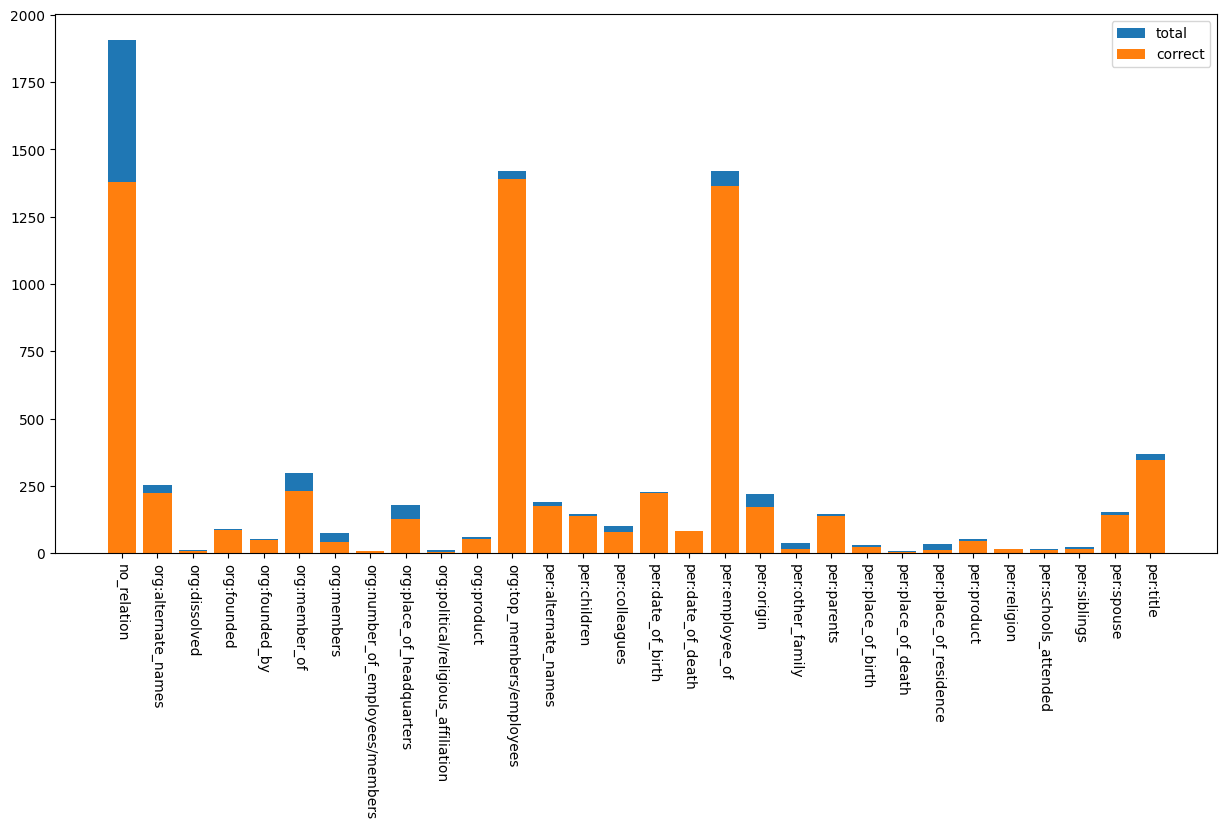

In [8]:
# 레이블 별 총 데이터 개수와 정답 데이터 개수 비교
plt.figure(figsize = (15, 7))
plt.bar(aug_label_stats.index, aug_label_stats['total'], label="total")
plt.bar(aug_label_stats.index, aug_label_stats['correct'], label="correct")
plt.legend()
plt.xticks(rotation=-90)
plt.show()

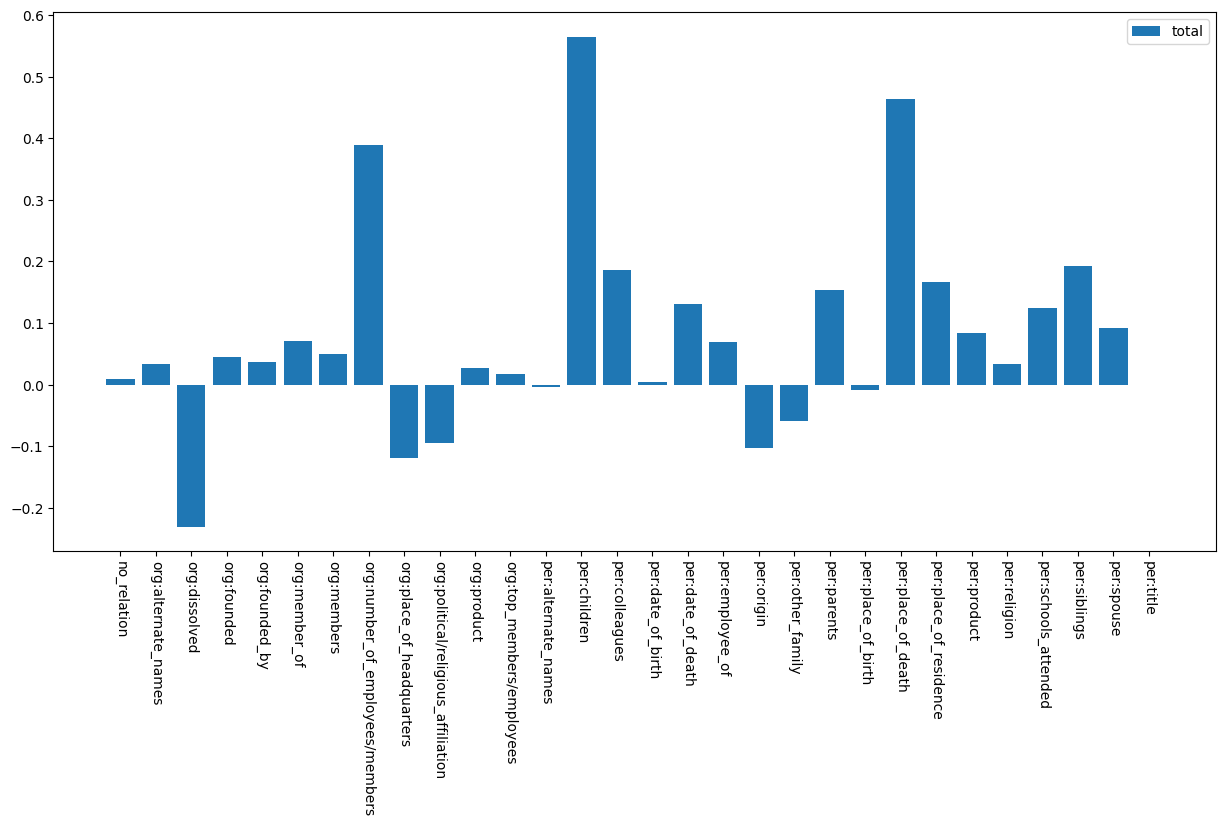

In [9]:
correct_ratio_compare = pd.DataFrame(aug_label_stats['correct_ratio'] - og_label_stats['correct_ratio'])
plt.figure(figsize = (15, 7))
plt.bar(aug_label_stats.index, aug_label_stats['correct_ratio'] - og_label_stats['correct_ratio'], label="total")
plt.legend()
plt.xticks(rotation=-90)
plt.show()